<a href="https://www.kaggle.com/code/priyankamukulsharma/bostonhousing-regression-part1?scriptVersionId=94143726" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%config Completer.use_jedi = False

In [3]:
dataset=pd.read_csv("../input/bostonhoustingmlnd/housing.csv")

In [4]:
dataset

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [5]:
corr=dataset.corr()

In [6]:
corr

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


<AxesSubplot:>

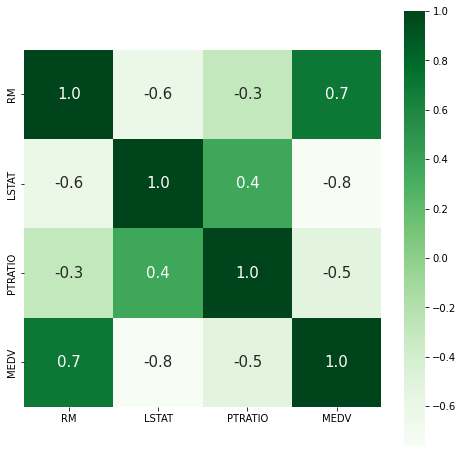

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [8]:
dataset.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [9]:
X=dataset.iloc[:,:-1].values
z=y=dataset.iloc[:,-1].values


In [10]:
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [11]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [12]:
model_name=[]
mean_error=[]

In [13]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

lr=LinearRegression()

cvs_lr=cross_val_score(lr,X,y,cv=5,scoring='neg_mean_squared_error')
model_name.append('lr')
mean_error.append(np.mean(cvs_lr))
cvs_lr,np.mean(cvs_lr),model_name,mean_error

(array([-3.16996173e+09, -8.49118414e+09, -1.67135644e+10, -1.31961396e+10,
        -1.05010583e+10]),
 -10414381637.151714,
 ['lr'],
 [-10414381637.151714])

In [14]:
#trying with ridge now

ridge=Ridge()
cvs_ridge=cross_val_score(ridge,X,y,cv=5,scoring='neg_mean_squared_error')
model_name.append('ridge')
mean_error.append(np.mean(cvs_ridge))
cvs_ridge,np.mean(cvs_ridge),model_name,mean_error

(array([-3.18223098e+09, -8.51454305e+09, -1.67792197e+10, -1.30755486e+10,
        -1.04194432e+10]),
 -10394197112.37843,
 ['lr', 'ridge'],
 [-10414381637.151714, -10394197112.37843])

In [15]:
#trying with lasso now
lasso=Lasso()
cvs_lasso=cross_val_score(lasso,X,y,cv=5,scoring='neg_mean_squared_error')
model_name.append('lasso')
mean_error.append(np.mean(cvs_lasso))

In [16]:
cvs_ridge,np.mean(cvs_ridge),model_name,mean_error

(array([-3.18223098e+09, -8.51454305e+09, -1.67792197e+10, -1.30755486e+10,
        -1.04194432e+10]),
 -10394197112.37843,
 ['lr', 'ridge', 'lasso'],
 [-10414381637.151714, -10394197112.37843, -10414464963.982954])

In [17]:
ScoreTable=pd.DataFrame(data=[model_name,mean_error]).T
ScoreTable.rename(columns={0:"Model Name",1:"Mean_error"})


,Model Name,Mean_error
0,lr,-10414381637.151714
1,ridge,-10394197112.378429
2,lasso,-10414464963.982954


In [18]:
# now using gridSearchCV for finding the best regularization parameter

parameters={'alpha':[0.001,0.01,0.1,1,10,100]}
cv_ridge=GridSearchCV(ridge,param_grid=parameters,scoring='neg_mean_squared_error')

In [19]:
cv_ridge.fit(X,y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [20]:
Ridge_details=[]
lasso_details=[]

In [21]:

Ridge_details.append(cv_ridge.best_estimator_)
Ridge_details.append(cv_ridge.best_score_)

In [22]:
Ridge_details

[Ridge(alpha=100), -10146819505.51907]

In [23]:
parameters={'alpha':[0.001,0.01,0.1,1,10,100]}
cv_lasso=GridSearchCV(lasso,param_grid=parameters,scoring='neg_mean_squared_error')

In [24]:
cv_lasso.fit(X,y)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [25]:
lasso_details.append(cv_lasso.best_estimator_)
lasso_details.append(cv_lasso.best_score_)

In [26]:
lasso_details

[Lasso(alpha=0.001), -10414381757.638432]

In [27]:
GridCVResults=pd.DataFrame(data=[Ridge_details,lasso_details])
GridCVResults

,0,1
0,Ridge(alpha=100),-1.014682e+10
1,Lasso(alpha=0.001),-1.041438e+10


In [28]:
norm_ridge=[]
norm_lasso=[]

ridge_1=Ridge(normalize=True)
lasso_1=Lasso(normalize=True)



In [29]:
ridge_Grid=GridSearchCV(ridge_1,param_grid=parameters,scoring='neg_mean_squared_error')
lasso_Grid=GridSearchCV(lasso_1,param_grid=parameters,scoring='neg_mean_squared_error')
ridge_Grid.fit(X,y)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

GridSearchCV(estimator=Ridge(normalize=True),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [30]:
lasso_Grid.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

GridSearchCV(estimator=Lasso(normalize=True),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [31]:
norm_ridge.append(ridge_Grid.best_estimator_)
norm_ridge.append(ridge_Grid.best_score_)
norm_lasso.append(lasso_Grid.best_estimator_)
norm_lasso.append(lasso_Grid.best_score_)

In [32]:
norm_score=pd.DataFrame(data=[norm_ridge,norm_lasso])

In [33]:
norm_score

,0,1
0,"Ridge(alpha=0.1, normalize=True)",-1.030252e+10
1,"Lasso(alpha=0.001, normalize=True)",-1.041438e+10


In [34]:
GridCVResults.merge(norm_score)

,0,1


In [35]:
GridCVResults

,0,1
0,Ridge(alpha=100),-1.014682e+10
1,Lasso(alpha=0.001),-1.041438e+10


# Lasso with alpha =0.001 has the minimum error.

# Now trying the polynomial regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)

In [37]:

X_poly=poly.fit_transform(X)
X_poly
X_poly.shape
X.shape

(489, 3)

**Apply Linear regression**

In [38]:
cvs_lr=cross_val_score(lr,X_poly,y,cv=10,scoring='neg_mean_squared_error')

In [39]:
cvs_lr,np.mean(cvs_lr)

(array([-2.55522907e+09, -1.85568921e+09, -5.18351618e+09, -7.15382433e+09,
        -6.76551224e+09, -3.82247760e+09, -4.08063861e+09, -1.24838953e+10,
        -6.74792307e+09, -4.51809086e+09]),
 -5516679648.463518)

In [40]:
parameters={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100]}
cv_lasso=GridSearchCV(lasso,param_grid=parameters,scoring='neg_mean_squared_error',cv=10)
cv_ridge=GridSearchCV(ridge,param_grid=parameters,scoring='neg_mean_squared_error',cv=10)

In [41]:
cv_lasso.fit(X_poly,y)
cv_ridge.fit(X_poly,y)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+12, tolerance: 1.253e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.063e+12, tolerance: 1.286e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                   100]},
             scoring='neg_mean_squared_error')

In [42]:
cv_ridge.best_estimator_,cv_ridge.best_score_,cv_lasso.best_estimator_,cv_lasso.best_score_,np.mean(cvs_lr)

(Ridge(alpha=1),
 -5358355142.443518,
 Lasso(alpha=100),
 -5381891414.948438,
 -5516679648.463518)

# <a id="1">1. Introduction</a> <br>
# Support vector machine

In [43]:
from sklearn.svm import SVR

In [44]:
svr=SVR(kernel = 'rbf')

In [45]:
#Scaling the features
from sklearn.preprocessing import StandardScaler

In [46]:
Sc_X=StandardScaler()
Sc_y=StandardScaler()

In [47]:

#y.shape
X=Sc_X.fit_transform(X)



In [48]:
X

array([[ 0.52055395, -1.1250769 , -1.5250831 ],
       [ 0.28104837, -0.53706982, -0.33974768],
       [ 1.46924486, -1.25935736, -0.33974768],
       ...,
       [ 1.14420158, -1.03178731,  1.17748167],
       [ 0.86114953, -0.91305511,  1.17748167],
       [-0.32704695, -0.71516812,  1.17748167]])

In [49]:
y=y.reshape(len(y),1)

In [50]:
y=Sc_y.fit_transform(y)


In [51]:
svr.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [52]:
y_pred=svr.predict(X)
svr_y=Sc_y.inverse_transform(y_pred.reshape(-1,1))

In [53]:
mean_error=mean_error

In [54]:
y_pred

array([ 7.87848611e-01,  2.37069753e-01,  1.72788968e+00,  1.35844120e+00,
        1.32681733e+00,  5.10935869e-01, -7.51242765e-02, -4.60155004e-01,
       -7.52895660e-01, -3.28504984e-01, -5.62516144e-01, -1.18626291e-01,
       -2.71607687e-01, -1.55495148e-01, -1.41103481e-01, -1.92967872e-01,
       -1.62015811e-01, -4.38206520e-01, -3.18833007e-01, -2.78692409e-01,
       -1.12574154e+00, -3.72469794e-01, -8.50274059e-01, -9.94988086e-01,
       -6.02810099e-01, -6.59194767e-01, -4.79981264e-01, -6.94877025e-01,
       -2.39584172e-01, -1.73847993e-01, -1.27998070e+00, -2.92645854e-01,
       -1.60506110e+00, -8.38292293e-01, -1.02678085e+00, -1.03482946e-01,
       -1.93033733e-01, -1.38379057e-01, -9.64246810e-02,  8.10396163e-01,
        1.54853152e+00,  1.03870324e+00,  2.03181243e-01,  1.74416455e-01,
       -2.06916963e-02, -2.75783814e-01, -1.74925155e-01, -2.86495111e-01,
       -8.20000351e-01, -1.83962495e-01, -1.35862842e-01, -7.85078822e-03,
        6.41088481e-01, -

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
mse=mean_squared_error(svr_y,z)

In [57]:
mse

3749686377.1463037

WOrking with decision tree regression in next notebook.